In [25]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from plotting import *
from utilsPCA import *

import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
#filename = 'root_files/histo_2Electrons_20893_mtdclusters.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff.root'
# filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff_100GeV.root'
filename = 'root_files/histo_2Electrons_global_pos.root'
#filename = 'root_files/histo_2Photons_1stLayerHGCal.root'
file = uproot.open(filename)

In [4]:
file.keys()

['ticlNtuplizer;1',
 'ticlNtuplizer/tracksters;1',
 'ticlNtuplizer/clusters;1',
 'ticlNtuplizer/graph;1',
 'ticlNtuplizer/candidates;1',
 'ticlNtuplizer/trackstersMerged;1',
 'ticlNtuplizer/associations;1',
 'ticlNtuplizer/simtrackstersSC;1',
 'ticlNtuplizer/simtrackstersCP;1',
 'ticlNtuplizer/fineSimTracksters;1',
 'ticlNtuplizer/tracks;1',
 'ticlNtuplizer/simTICLCandidate;1',
 'ticlNtuplizer/ETL;1']

In [5]:
simtrackstersSC = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]
ETLclusters = file["ticlNtuplizer/ETL"]
tracksters  = file["ticlNtuplizer/tracksters"]

In [6]:
tracksters.keys()

['event',
 'NClusters',
 'NTracksters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'trackster_barycenter_eta',
 'trackster_barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity',
 'layer_cluster_seed']

In [7]:
ETL_time    = ETLclusters["mtd_clusters_time"].array()
ETL_timeErr = ETLclusters["mtd_clusters_timeErr"].array()
ETL_vx      = ETLclusters["mtd_clusters_x"].array()
ETL_vy      = ETLclusters["mtd_clusters_y"].array()
ETL_vz      = ETLclusters["mtd_clusters_z"].array()

In [8]:
SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()
SC_vx     = simtrackstersSC["vertices_x"].array()
SC_vy     = simtrackstersSC["vertices_y"].array()
SC_vz     = simtrackstersSC["vertices_z"].array()
SC_ve     = simtrackstersSC["vertices_energy"].array()
SC_vi     = simtrackstersSC["vertices_indexes"].array()
SC_vt     = simtrackstersSC["vertices_time"].array()
SC_vtErr  = simtrackstersSC["vertices_timeErr"].array()
SC_vm     = simtrackstersSC["vertices_multiplicity"].array()
SC_bx     = simtrackstersSC["barycenter_x"].array()
SC_by     = simtrackstersSC["barycenter_y"].array()
SC_bz     = simtrackstersSC["barycenter_z"].array()
SC_be     = simtrackstersSC["raw_energy"].array()
    
SC_CALO_time     = simtrackstersSC["time"].array()
SC_CALO_err      = simtrackstersSC["timeError"].array()
SC_boundary_time = simtrackstersSC["BoundaryTime"].array()
SC_boundary_err  = simtrackstersSC["BoundaryTimeError"].array()
SC_MTD_time      = simtrackstersSC["MTDtime"].array()
SC_MTD_err       = simtrackstersSC["MTDtimeError"].array()

In [9]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()
CP_vx     = simtrackstersCP["vertices_x"].array()
CP_vy     = simtrackstersCP["vertices_y"].array()
CP_vz     = simtrackstersCP["vertices_z"].array()
CP_ve     = simtrackstersCP["vertices_energy"].array()
CP_vi     = simtrackstersCP["vertices_indexes"].array()
CP_vt     = simtrackstersCP["vertices_time"].array()
CP_vtErr  = simtrackstersCP["vertices_timeErr"].array()
CP_vm     = simtrackstersCP["vertices_multiplicity"].array()
CP_bx     = simtrackstersCP["barycenter_x"].array()
CP_by     = simtrackstersCP["barycenter_y"].array()
CP_bz     = simtrackstersCP["barycenter_z"].array()
CP_be     = simtrackstersCP["raw_energy"].array()
    
CP_CALO_time     = simtrackstersCP["time"].array()
CP_CALO_err      = simtrackstersCP["timeError"].array()
CP_boundary_time = simtrackstersCP["BoundaryTime"].array()
CP_boundary_err  = simtrackstersCP["BoundaryTimeError"].array()
CP_MTD_time      = simtrackstersCP["MTDtime"].array()
CP_MTD_err       = simtrackstersCP["MTDtimeError"].array()

In [10]:
reco_vx     = tracksters["vertices_x"].array()
reco_vy     = tracksters["vertices_y"].array()
reco_vz     = tracksters["vertices_z"].array()
reco_ve     = tracksters["vertices_energy"].array()
reco_vi     = tracksters["vertices_indexes"].array()
reco_vt     = tracksters["vertices_time"].array()
reco_vtErr  = tracksters["vertices_timeErr"].array()
reco_vm     = tracksters["vertices_multiplicity"].array()
reco_bx     = tracksters["barycenter_x"].array()
reco_by     = tracksters["barycenter_y"].array()
reco_bz     = tracksters["barycenter_z"].array()
reco_be     = tracksters["raw_energy"].array()
    
reco_CALO_time     = tracksters["time"].array()
reco_CALO_err      = tracksters["timeError"].array()

In [11]:
print(f'There are {len(SC_CALO_time)} events in the file')

There are 300 events in the file


## Plot the times

In [12]:
#ak.count(SC_CALO_time)
#ak.sum(SC_CALO_time>-98)//100
#len(ak.flatten(SC_MTD_time))

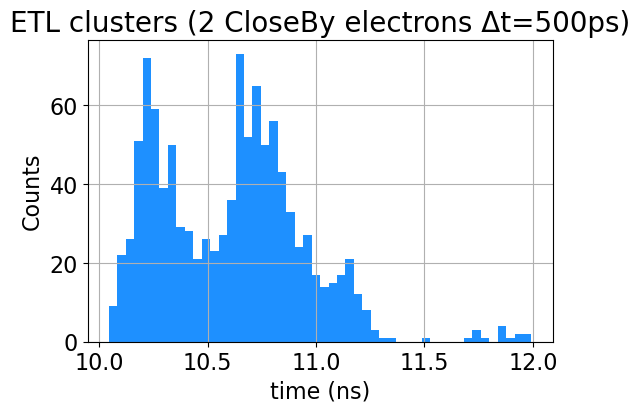

In [13]:
hist(ETL_time[ETL_time<12], bins=50, title='ETL clusters (2 CloseBy electrons Δt=500ps)', xlabel='time (ns)')

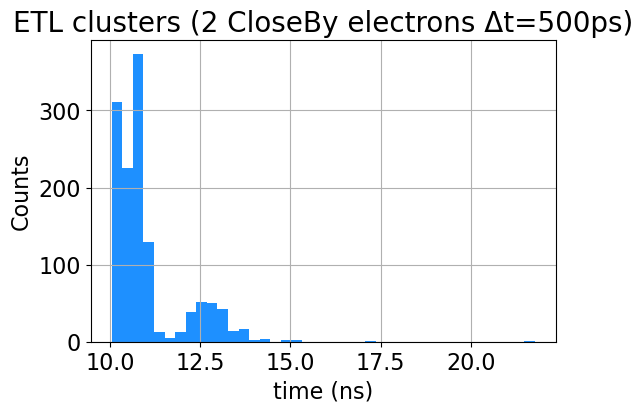

In [14]:
hist(ETL_time, bins=40, title='ETL clusters (2 CloseBy electrons Δt=500ps)', xlabel='time (ns)')

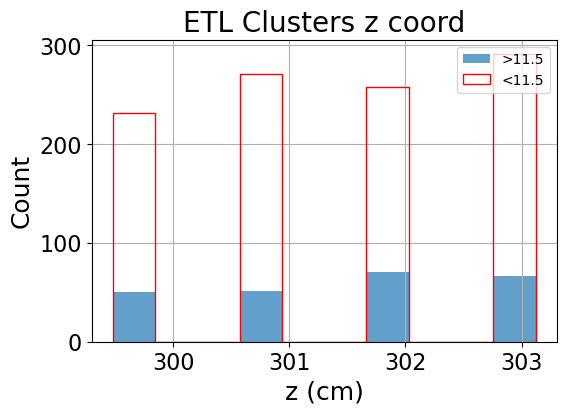

In [15]:
plt.figure(dpi=100)
plt.hist((ak.flatten(ETL_vz)[ak.flatten(ETL_time) > 11.5]), bins=10, label='>11.5', alpha=.7)
plt.hist((ak.flatten(ETL_vz)[ak.flatten(ETL_time) < 11.5]), bins=10, label='<11.5', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('ETL Clusters z coord')
plt.xlabel('z (cm)', size=18)
plt.ylabel('Count', size=18)
plt.show()

In [16]:
nclus = 0
minc = 10
maxc = 0
for i in range(len(ETL_time)):
    l = len(ETL_time[i])
    nclus += l
    if l < minc:
        minc = l
    if l > maxc:
        maxc = l
print(nclus/300, minc, maxc)

4.3 1 8


In [17]:
np.unique(list(np.array(ak.flatten(ak.flatten(CP_vz)))))

array([322.15499878, 323.14898682, 325.21200562, 326.20599365,
       328.26901245, 329.26300049, 331.32598877, 332.32000732,
       334.38299561, 335.37701416, 337.44000244, 338.43399048,
       340.49700928, 341.49099731, 343.5539856 , 344.54800415,
       346.61099243, 347.60501099, 349.99301147, 350.98699951,
       353.375     , 354.36898804, 356.75698853, 357.75100708,
       360.13900757, 361.13299561, 367.97601318, 374.28100586,
       380.58599854, 386.89099121])

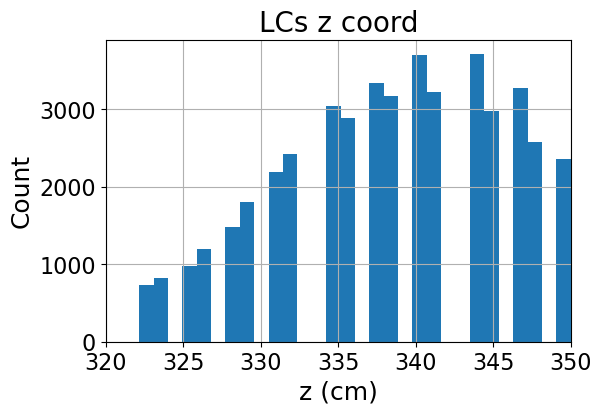

In [18]:
plt.figure(dpi=100)
plt.hist(ak.flatten(ak.flatten(CP_vz[CP_vz < 350])), bins=30)
plt.grid()
plt.xlim(320,350)
plt.title('LCs z coord')
plt.xlabel('z (cm)', size=18)
plt.ylabel('Count', size=18)
plt.show()

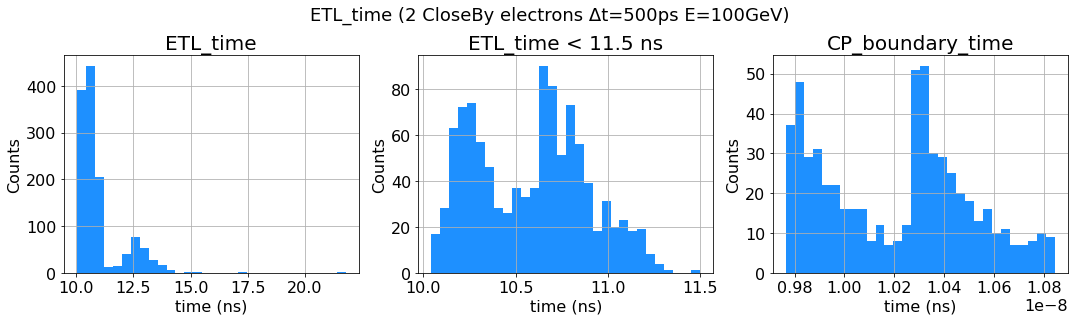

In [19]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fig.suptitle('ETL_time (2 CloseBy electrons Δt=500ps E=100GeV)', size=18, y=1.05)

subplot(axs[0], ETL_time, title='ETL_time')
axs[0].set_title('ETL_time')
subplot(axs[1], ETL_time[ETL_time<11.5], title='ETL_time < 11.5 ns')
subplot(axs[2], CP_boundary_time, title='CP_boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

In [20]:
#from x,y,z to R
mask = (CP_vt>-80)# & (CP_ve<1.1) & (CP_ve>1)

vector = vec.awk({"x": CP_vx[mask], 
                  "y": CP_vy[mask], "z": CP_vz[mask]})
R = (vector.eta**2 + vector.phi**2)**0.5

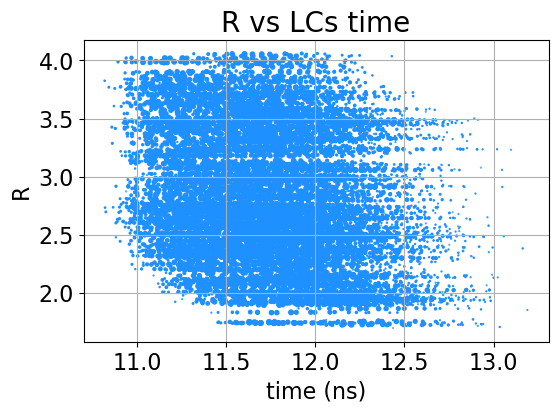

In [21]:
scatter(ak.flatten(CP_vt[mask]), ak.flatten(R), title='R vs LCs time', ylabel='R', s=ak.flatten(CP_ve[mask]))

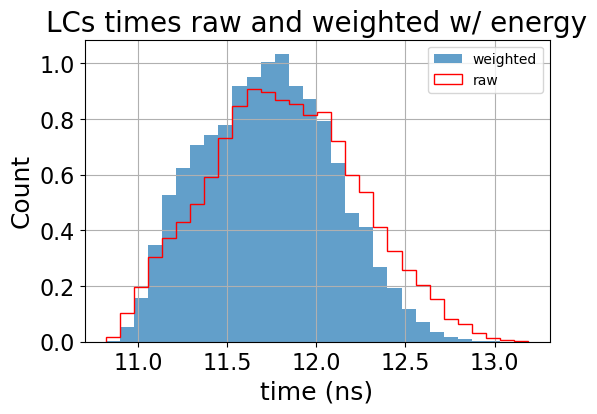

In [22]:
plt.figure(dpi=100)
plt.hist(ak.flatten(ak.flatten(CP_vt)[ak.flatten(CP_vt) > -80]), weights=ak.flatten(ak.flatten(CP_ve)[ak.flatten(CP_vt) > -80]), bins=30, density=True, label='weighted', alpha=.7)
plt.hist(ak.flatten(ak.flatten(CP_vt)[ak.flatten(CP_vt) > -80]), bins=30, density=True, label='raw', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('LCs times raw and weighted w/ energy')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

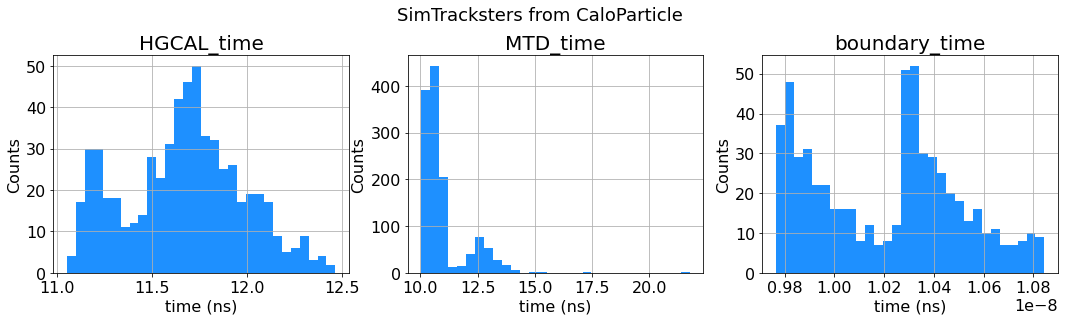

In [23]:
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
# fig.suptitle('SimTracksters from SimClusters', size=18, y=1.05)

# subplot(axs[0], SC_CALO_time, title='HGCAL_time')
# axs[0].set_title('HGCAL_time')
# subplot(axs[1], ETL_time, title='MTD_time')
# subplot(axs[2], SC_boundary_time, title='boundary_time')

# for ax in axs.flat:
#     ax.set_xlabel('time (ns)', fontsize = 16.0)    
#     ax.set_ylabel('Counts', fontsize = 16.0)
#-------
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fig.suptitle('SimTracksters from CaloParticle', size=18, y=1.05)

subplot(axs[0], CP_CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], ETL_time, title='MTD_time')
subplot(axs[2], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

## Visual representation

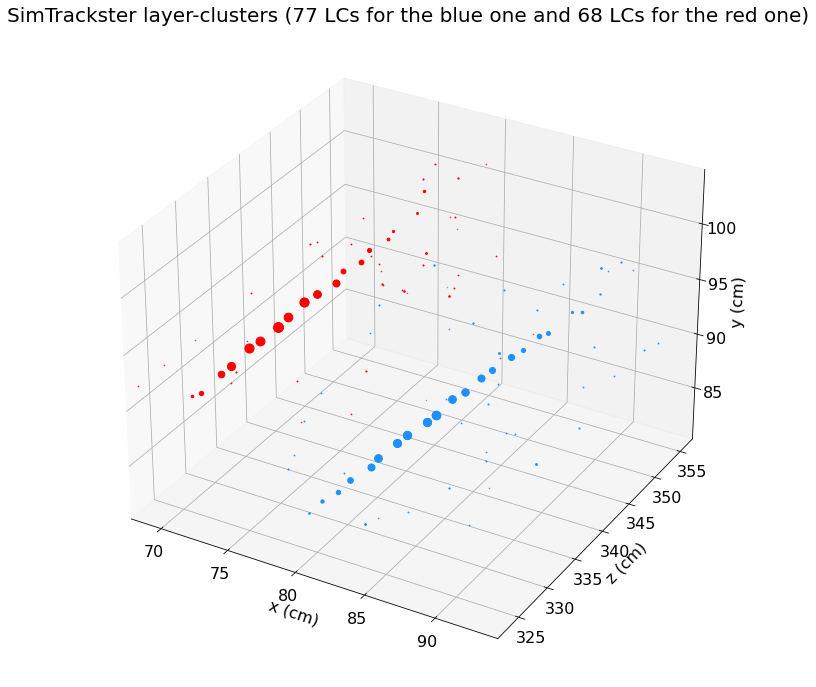

In [26]:
eid = 1

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_zlim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_ylim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax1.scatter(x, z, y, s=8*e, c='dodgerblue')

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c='red')

ax1.set_title(f"SimTrackster layer-clusters ({len(tx1)} LCs for the blue one and {len(tx2)} LCs for the red one)")
plt.show()

In [62]:
%matplotlib widget
eid=20

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

ax1.set_xlim(-60,-50) #ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
# ax1.set_ylim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_zlim(-14,-8) #ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
blue = 0
for x, y, z, e, t in zip(tx1, ty1, tz1, te1, tt1):
    if(t>-99):
        ax1.scatter(x, z, y, s=20*e, c='dodgerblue', alpha=0.5)
        ax1.text(x, z, y, '%.3f ns' % (t) , size=16) #+ (x**2+y**2+z**2)**0.5/C)
        blue += 1

# red = 0
# for x, y, z, e, t in zip(tx2, ty2, tz2, te2, tt2):
#     if(t>-99):
#         ax1.scatter(x, z, y, s=20*e, c='r', alpha=0.5)
#         ax1.text(x, z, y, '%.3f ns' % (t), size=10) #+ (x**2+y**2+z**2)**0.5/C
#         red += 1

#ETL
for i in range(len(ETL_vx[eid])):
    if ETL_time[eid][i] < 11.5:
        ax1.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='forestgreen')
        ax1.text(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], '\n%.3f ns' % (ETL_time[eid][i]), size = 16)

#boundary
# for i in range(len(CP_boundx[eid])):
#     ax1.scatter(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], marker='o', s=20, c='forestgreen')
#     ax1.text(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], '\n%.3f ns' % (CP_boundary_time[eid][i]), size = 12)
    
ax1.set_title(f"SimTrackster layer-clusters with time\n({blue} LCs for the blue one and {red} LCs for the red one)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
def nodes_times_pca(vx, vy, vz, ve, vt, vi, vm, bx, by, bz, be, bt, ev, tr_id, DST_THR=2.5, bubble_size=10, 
                              NEIGHBOUR_THR=30, ENERGY_RATIO_THR=0.01, MIN_EDGE_LEN=1, PCA_NEIGHBOUR_THR=1, 
                              secondary_edges = False):
    # Project the points on pca
    edges, nodes = set(), set()
    times = []

    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(vx[ev], vy[ev], vz[ev], ve[ev], vt[ev], vi[ev], vm[ev])

    if tr_id == 0:
        vxt = tx1
        vyt = ty1
        vzt = tz1
        vet = te1
        vtt = tt1
        
        bxt = bx[ev][0]
        byt = by[ev][0]
        bzt = bz[ev][0]
        bet = be[ev][0]
        btt = bt[ev][0]
    else:
        vxt = tx2
        vyt = ty2
        vzt = tz2
        vet = te2
        vtt = tt2    
        
        bxt = bx[ev][1]
        byt = by[ev][1]
        bzt = bz[ev][1]
        bet = be[ev][1]   
        btt = bt[ev][1]
    #ax.scatter(vxt, vyt, vzt, s=vet*bubble_size, alpha=0.2, c="m", zorder=-5)  
    
    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    #edges.add((tuple(b_coord), tuple(b_coord)))
    nodes.add(tuple(b_coord))
    times.append(np.array([bxt, byt, bzt, btt]))
  
    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters 
        # with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    min_point = np.zeros(4)
    max_point = np.zeros(4)
    # try create main edges
    
    for x,y,z,e,i,j in data:

        point = np.array([x, y, z, i])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if min_p[2] > z_cl and point[3]>-80:
                min_p = closest_point
                min_point = point
            if max_p[2] < z_cl and point[3]>-80:
                max_p = closest_point  
                max_point = point  
        
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            edges.add((tuple(min_p), tuple(b_coord)))
            nodes.add(tuple(min_p))
            times.append(min_point)

        if not np.allclose(max_p, b_coord, atol=0.1):
            edges.add((tuple(max_p), tuple(b_coord)))
            nodes.add(tuple(max_p))
            times.append(max_point)
    else:
        min_p, max_p = b_coord, b_coord
        min_point[:3], max_point[:3] = b_coord, b_coord
        min_point[3], max_point[3] = btt, btt

    return edges, nodes, times

In [29]:
%matplotlib widget
eid = 0
Z_boundary = CP_boundz[eid][0] #cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of an electron")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

minX = ak.min((CP_vx[eid], CP_boundx[eid]))
maxX = ak.max((CP_vx[eid], CP_boundx[eid]))
ax.set_xlim(minX, maxX) #ak.min((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vx[eid], CP_boundx[eid]))
# ax.set_xlim(ak.min((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vx[eid], CP_boundx[eid])))
# ax.set_zlim(ak.min((CP_vy[eid], CP_boundy[eid])), ak.max((CP_vy[eid], CP_boundy[eid])))
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))

# plot the boundary
xx, yy = np.meshgrid(np.linspace(minX, maxX, 10), 
                     np.linspace(ak.min((CP_vy[eid], CP_boundy[eid])), ak.max((CP_vy[eid], CP_boundy[eid])), 10))
ax.plot_surface(xx, np.ones((10,10))*Z_boundary, yy, color='forestgreen', alpha=0.5)

# tracksters
tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)
        
# truth
for i in range(len(CP_boundx[eid])):
    ax.scatter(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], marker='X', s=20, c='green')
    ax.text(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], 'Truth: %.3f ns\n' % (CP_boundary_time[eid][i]), size = 12)
    
# draw ETL detector
a = (minX, ak.min((CP_vy[eid], CP_boundy[eid])), ak.min(ETL_vz[ETL_time < 11.5][eid]))  # p1
b = (maxX, ak.max((CP_vy[eid], CP_boundy[eid])), ak.max(ETL_vz[ETL_time < 11.5][eid]))  # p2
plot_cube(a, b, ax)

#PCA
all_event_edges, all_event_nodes, all_event_times = [], [], []
for tr_id in range(len(CP_bx[eid])):    
    internal_trackster_edges, internal_trackster_nodes, times = nodes_times_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm,
                                                      CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                      tr_id=tr_id, bubble_size=100, secondary_edges = False)
    all_event_edges.append(internal_trackster_edges)
    all_event_nodes.append(internal_trackster_nodes)
    all_event_times.append(times)

for edges in all_event_edges:
    for e in edges:
        ax.plot([e[0][0], e[1][0]], [e[0][2], e[1][2]], [e[0][1], e[1][1]], c='red')
for nodes in all_event_nodes:
    for n in nodes:
        ax.scatter(n[0], n[2], n[1], s=10, c='red')
for times in all_event_times:
    for x, y, z, t in times:
        ax.text(x, z, y, '%.3f ns' % (t), size = 12)
        
# save closest node to boundary
closest = []
for nodes in all_event_nodes:
    a = np.array(list(nodes))
    closest.append(np.sort(a.T).T[0])
    
# ETL clusters and time for the nearest to pca propagation
distance0 = 999
distance1 = 999
index0    = -1
index1    = -1
for i in range(len(ETL_vx[eid])):
    if ETL_time[eid][i] < 11.5:
        ax.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='blue')
        d0 = distance_point_to_segment(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]), 
                                       np.array([CP_boundx[eid][0], CP_boundy[eid][0], CP_boundz[eid][0]]), 
                                       np.array(closest[0]))
        d1 = distance_point_to_segment(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]), 
                                       np.array([CP_boundx[eid][1], CP_boundy[eid][1], CP_boundz[eid][1]]), 
                                       np.array(closest[1]))
    if d0 < distance0:
        index0 = i
        distance0 = d0

    if d1 < distance1:
        index1 = i
        distance1 = d1
        
if index0>-1:    
    ax.text(ETL_vx[eid][index0], ETL_vz[eid][index0], ETL_vy[eid][index0], '\n%.3f ns' % (ETL_time[eid][index0]), size = 12)
if index1>-1:    
    ax.text(ETL_vx[eid][index1], ETL_vz[eid][index1], ETL_vy[eid][index1], '\n%.3f ns' % (ETL_time[eid][index1]), size = 12)

# propagate to boundary
for i, (nodes, times) in enumerate(zip(all_event_nodes,all_event_times)):
    nodi = np.array(list(nodes))
    tempi = np.sort(np.array(times)[:, 3])
    T = (Z_boundary - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

    projection = nodi[0] + T*(nodi[-1] - nodi[0])
    ax.scatter(projection[0], projection[2], projection[1], s=20, c='red')
    ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='red', linestyle='dashed')
    
    #boundary = np.array([CP_boundx[eid][i], CP_boundy[eid][i], CP_boundz[eid][i]])
    distance = np.linalg.norm(closest[i] - projection)
    #bt = CP_CALO_time[eid][i]
    #boundary = np.array([CP_boundx[eid][i], CP_boundy[eid][i], CP_boundz[eid][i]])
    #deltaT = tempi[0] - distance/(np.linalg.norm(projection)/bt)
    # to not use g4 put v=c
    deltaT = tempi[0] - distance/C
    ax.text(projection[0], projection[2], projection[1], '\nProp: %.3f ns' % (deltaT), size = 12)
# # propagate time from pca to boundary
# for i, times in enumerate(all_event_times):
#     tempi = np.sort(np.array(times)[:, 3])
#     boundary = np.array([CP_boundx[eid][i], CP_boundy[eid][i], CP_boundz[eid][i]])
#     distance = np.linalg.norm(closest[i] - boundary)
#     bt = CP_CALO_time[eid][i]
#     deltaT = tempi[0] - distance/(np.linalg.norm(boundary)/bt)
#     ax.text()

#set_axes_equal(ax)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
def nodes_pca(vx, vy, vz, ve, vt, vi, vm, bx, by, bz, be, bt, ev, tr_id,
                     ENERGY_RATIO_THR=0.01, PCA_NEIGHBOUR_THR=1):
    # Project the points on pca
    nodes = []
    eid=ev
    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(vx[eid], vy[eid], vz[eid], ve[eid], vt[eid], vi[eid], vm[eid])

    if tr_id == 0:
        vxt = tx1
        vyt = ty1
        vzt = tz1
        vet = te1
        vtt = tt1
        
        bxt = bx[ev][0]
        byt = by[ev][0]
        bzt = bz[ev][0]
        bet = be[ev][0]
        btt = bt[ev][0]
    else:
        vxt = tx2
        vyt = ty2
        vzt = tz2
        vet = te2
        vtt = tt2    
        
        bxt = bx[ev][1]
        byt = by[ev][1]
        bzt = bz[ev][1]
        bet = be[ev][1]   
        btt = bt[ev][1]
    
    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    nodes.append(np.array([bxt, byt, bzt, btt]))
  
    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    min_point = np.zeros(4)
    max_point = np.zeros(4)
    # try create main edges
    
    for x,y,z,e,i,j in data:

        point = np.array([x, y, z, i])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if min_p[2] > z_cl and point[3]>-80:
                min_p = closest_point
                min_point = point
            if max_p[2] < z_cl and point[3]>-80:
                max_p = closest_point  
                max_point = point  
        
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            nodes.append(min_point)

        if not np.allclose(max_p, b_coord, atol=0.1):
            nodes.append(max_point)
    else:
        min_p, max_p = b_coord, b_coord
        min_point[:3], max_point[:3] = b_coord, b_coord
        min_point[3], max_point[3] = btt, btt
    
    return nodes

In [31]:
%matplotlib widget
eid = 10

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two CloseBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

minX = ak.min((CP_vx[eid], CP_boundx[eid]))
maxX = ak.max((CP_vx[eid], CP_boundx[eid]))
ax.set_xlim(minX, maxX)

# ax.set_xlim(ak.min((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vx[eid], CP_boundx[eid])))
# ax.set_zlim(ak.min((CP_vy[eid], CP_boundy[eid])), ak.max((CP_vy[eid], CP_boundy[eid])))
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))

# plot the boundary
xx, yy = np.meshgrid(np.linspace(ak.min((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vx[eid], CP_boundx[eid])), 10), 
                     np.linspace(ak.min((CP_vy[eid], CP_boundy[eid])), ak.max((CP_vy[eid], CP_boundy[eid])), 10))
ax.plot_surface(xx, np.ones((10,10))*CP_boundz[eid][0], yy, color='forestgreen', alpha=0.35)

# sort the nodes wrt to time
all_event_nodes = []
for tr_id in range(len(CP_bx[eid])):    
    all_event_nodes.append(nodes_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm,
                                                       CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                       tr_id=tr_id))

# plot the PCA
for nodes in all_event_nodes:
    nodes = np.array(sorted(nodes,key=lambda x: x[3]))
    for i, n in enumerate(nodes):
        ax.scatter(n[0], n[2], n[1], s=10, c='red')
        ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
        if i+1 != len(nodes):
            ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

# propagate time from PCA to boundary
bounds = np.array([CP_boundx[eid], CP_boundy[eid], CP_boundz[eid], CP_boundary_time[eid]]).T
for i, (nodes, bound) in enumerate(zip(all_event_nodes, bounds)):
    nodi = np.array(sorted(nodes,key=lambda x: x[2]))
    T = (bound[2] - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

    projection = nodi[0][:3] + T*(nodi[-1][:3] - nodi[0][:3])
#     d2bound = np.linalg.norm(bound[:3])
#     v2bound = d2bound / bound[3]
#     dproj2pca = np.linalg.norm(nodi[0][:3] - projection) # from the projection to the beginning of the PCA
#     tproj2pca = dproj2pca / v2bound
#     time2proj = nodi[0][3] - tproj2pca
    d2pca = np.linalg.norm(nodi[0][:3])
    v2pca = d2pca / (nodi[0][3]- 0.5*i)
    dproj2pca = np.linalg.norm(nodi[0][:3] - projection) # from the projection to the beginning of the PCA
    tproj2pca = dproj2pca / v2pca
    time2proj = nodi[0][3] - tproj2pca       
    
    ax.scatter(projection[0], projection[2], projection[1], s=20, c='red')#, label='Prop: %.3f ns' % (time2proj))
    ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='red', linestyle='dashed', alpha=0.5) 
    ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns' % (time2proj), 
            size = 12, horizontalalignment='right', verticalalignment='top', color='red')

# truth
for i in range(len(CP_boundx[eid])):
    ax.scatter(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], marker='x', s=20, c='darkgreen')
    ax.text(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], 'Truth: %.3f ns' % (CP_boundary_time[eid][i]), 
            size = 12, horizontalalignment='right', verticalalignment='bottom', color='darkgreen')
    
# draw ETL
a = (ak.min((CP_vx[eid], CP_boundx[eid])), ak.min((CP_vy[eid], CP_boundy[eid])), ak.min(ETL_vz[eid]))  # p1
b = (ak.max((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vy[eid], CP_boundy[eid])), ak.max(ETL_vz[eid]))  # p2
plot_cube(a, b, ax)

# save closest node to boundary
closest = []
for nodes in all_event_nodes:
    a = np.array(list(nodes))
    closest.append(np.sort(a.T).T[0])
    
# ETL clusters and time for the nearest to pca propagation
distance0 = 999
distance1 = 999
index0    = -1
index1    = -1
for i in range(len(ETL_vx[eid])):
    if ETL_time[eid][i] < 11.5:
        ax.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='blue')
        d0 = distance_point_to_segment(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]), 
                                       np.array([CP_boundx[eid][0], CP_boundy[eid][0], CP_boundz[eid][0]]), 
                                       np.array(closest[0][:3]))
        d1 = distance_point_to_segment(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]), 
                                       np.array([CP_boundx[eid][1], CP_boundy[eid][1], CP_boundz[eid][1]]), 
                                       np.array(closest[1][:3]))
    if d0 < distance0:
        index0 = i
        distance0 = d0

    if d1 < distance1:
        index1 = i
        distance1 = d1
        
if index0>-1 and ETL_time[eid][index0] < 11.5:    
    ax.text(ETL_vx[eid][index0], ETL_vz[eid][index0], ETL_vy[eid][index0], '%.3f ns' % (ETL_time[eid][index0]), size = 12)
if index1>-1 and ETL_time[eid][index1] < 11.5:    
    ax.text(ETL_vx[eid][index1], ETL_vz[eid][index1], ETL_vy[eid][index1], '%.3f ns' % (ETL_time[eid][index1]), size = 12)

#set_axes_equal(ax)
# plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
plt.close(fig)

## compare speed

In [33]:
def nsmall(a, n):
    smallest = np.partition(a, n-1)[n-1]
    return np.argwhere(a==smallest)[0][0]

In [34]:
v_hgcal = []
v_geant = []
v_etl   = []
for eid in range(300):
    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])

    ind = nsmall(tz1,1)
    i=2
    while (tt1[ind] < -80):
        ind = nsmall(tz1, i)
        i+=1
    first_LC = np.array([tx1[ind], ty1[ind], tz1[ind]])
    boundary = np.array([CP_boundx[eid][0], CP_boundy[eid][0], CP_boundz[eid][0]])
    v_hgcal.append(np.linalg.norm(first_LC)/tt1[ind])
    bt = CP_boundary_time[eid][0]
    v_geant.append(np.linalg.norm(boundary)/bt)
    
    ind = np.argmin(tz2)
    i=2
    while (tt2[ind] < -80):
        ind = nsmall(tz2, i)
        i+=1
    first_LC = np.array([tx2[ind], ty2[ind], tz2[ind]])
    boundary = np.array([CP_boundx[eid][1], CP_boundy[eid][1], CP_boundz[eid][1]])
    v_hgcal.append(np.linalg.norm(first_LC)/(tt2[ind]-0.5))
    bt = CP_boundary_time[eid][1]-0.5
    v_geant.append(np.linalg.norm(boundary)/bt)
    
    for i in range(len(ETL_vx[eid])):
        if ETL_time[eid][i] < 11.5:
            d = np.linalg.norm(np.array([ETL_vx[eid][i], ETL_vy[eid][i], ETL_vz[eid][i]]))
            v_etl.append(d/ETL_time[eid][i])

In [35]:
from plotting import *

In [36]:
nphist(v_hgcal, title='hgcal')
nphist(v_geant, title='geant')
#nphist(v_etl,   title='etl')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## recompute BarTime

In [37]:
def barTime(vx, vy, vz, ve, vt, vm, bx, by, bz):
    x = vx[vt>-99]
    y = vy[vt>-99]
    z = vz[vt>-99]
    e = ve[vt>-99]
    t = vt[vt>-99]
    m = vm[vt>-99]
    d = (x*x + y*y + z*z)**0.5
    new_t = t - d/C
    # media pesata dei tempi
    tot_en = ak.sum(e, axis=2) 
    w = e / m
    mean = ak.sum(new_t * w, axis=2) / ak.sum(w, axis=2) + (bx*bx+by*by+bz*bz)**0.5/C
    error = 1. / ((ak.sum(w, axis=2))**0.5)
    
    return mean, error

In [38]:
new_CP_bt, new_CP_btErr = barTime(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vm, CP_bx, CP_by, CP_bz)
new_SC_bt, new_SC_btErr = barTime(SC_vx, SC_vy, SC_vz, SC_ve, SC_vt, SC_vm, SC_bx, SC_by, SC_bz)

## average of the first 3 LCs

In [39]:
def time_pca(vx, vy, vz, ve, vt, vi, vm,
             bx, by, bz, be, bt, 
             ev, tr_id, ENERGY_RATIO_THR=0.01, PCA_NEIGHBOUR_THR=1):
    # Project the points on pca
    nodes = []
    
    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(vx[ev], vy[ev], vz[ev], ve[ev], vt[ev], vi[ev], vm[ev])

    if tr_id == 0:
        vxt = tx1
        vyt = ty1
        vzt = tz1
        vet = te1
        vtt = tt1
        
        bxt = bx[ev][0]
        byt = by[ev][0]
        bzt = bz[ev][0]
        bet = be[ev][0]
        btt = bt[ev][0]
    else:
        vxt = tx2
        vyt = ty2
        vzt = tz2
        vet = te2
        vtt = tt2    
        
        bxt = bx[ev][1]
        byt = by[ev][1]
        bzt = bz[ev][1]
        bet = be[ev][1]   
        btt = bt[ev][1]
    
    # Get distances between the LCs
    #dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T
    #positions = np.array(sorted(positions,key=lambda x: abs(x[2]))) # sort by z

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    if (len(vet)==0):
        print('No energies')
        return ak.Array([-1])
    
    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    nodes.append(np.array([bxt, byt, bzt, btt]))
  
    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,t,j] for x,y,z,e,t,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")
        
    # try create main edges
    min_point = np.zeros(4)
    max_point = np.zeros(4)
    
    for x,y,z,e,t,j in data:

        point = np.array([x, y, z, t])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if z_cl > 0:
                if min_p[2] > z_cl and point[3]>-99:
                    min_p = closest_point
                    min_point = point

                if max_p[2] < z_cl:# and point[3]>-99:
                    max_p = closest_point  
                    max_point = point  
            else:
                if min_p[2] > z_cl:
                    min_p = closest_point
                    min_point = point
                if max_p[2] < z_cl and point[3]>-99:
                    max_p = closest_point  
                    max_point = point  

    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            nodes.append(min_point)

        if not np.allclose(max_p, b_coord, atol=0.1):
            nodes.append(max_point)
#     else:
#         min_p, max_p = b_coord, b_coord
#         min_point[:3], max_point[:3] = b_coord, b_coord
#         min_point[3], max_point[3] = btt, btt
        
    return np.array(sorted(nodes,key=lambda x: abs(x[2])))

In [43]:
%matplotlib widget
eid = 194

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two closeBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

minX = ak.min((SC_vx[eid], SC_boundx[eid]))
maxX = ak.max((SC_vx[eid], SC_boundx[eid]))
ax.set_xlim(minX, maxX)

# plot the boundary
xx, yy = np.meshgrid(np.linspace(minX, maxX, 10), 
                     np.linspace(ak.min((SC_vy[eid], SC_boundy[eid])), ak.max((SC_vy[eid], SC_boundy[eid])), 10))
ax.plot_surface(xx, np.ones((10,10))*SC_boundz[eid][0], yy, color='forestgreen', alpha=0.5)

# plot the tracksters
tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid], SC_vt[eid], SC_vi[eid], SC_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)
        
# truth
for i in range(len(SC_boundx[eid])):
    ax.scatter(SC_boundx[eid][i], SC_boundz[eid][i], SC_boundy[eid][i], marker='X', s=20, c='green')
    ax.text(SC_boundx[eid][i], SC_boundz[eid][i], SC_boundy[eid][i], 'Truth: %.3f ns\n' % (SC_boundary_time[eid][i]), size = 12)
    
# draw ETL detector
a = (minX, ak.min((SC_vy[eid], SC_boundy[eid])), ak.min(ETL_vz[ETL_time < 11.5][eid]))  # p1
b = (maxX, ak.max((SC_vy[eid], SC_boundy[eid])), ak.max(ETL_vz[ETL_time < 11.5][eid]))  # p2
plot_cube(a, b, ax)

# PCA
all_event_nodes = []
b_coord = []
for tr_id in range(len(SC_bx[eid])):    
    all_event_nodes.append(time_pca(SC_vx, SC_vy, SC_vz, SC_ve, SC_vt, SC_vi, SC_vm,
                                    SC_bx, SC_by, SC_bz, SC_be, new_SC_bt, ev=eid,
                                    tr_id=tr_id))
    b_coord.append(np.array([SC_bx[eid][tr_id], SC_by[eid][tr_id], SC_bz[eid][tr_id]]))

# plot the PCA
for nodes in all_event_nodes:                
    nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
    for i, n in enumerate(nodes):
        ax.scatter(n[0], n[2], n[1], s=10, c='red')
        ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
        if i+1 != len(nodes):
            ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [44]:
hgcal_layers = np.unique(sorted(abs(ak.flatten(ak.flatten(CP_vz)))))
print(hgcal_layers)

[322.15499878 323.14898682 325.21200562 326.20599365 328.26901245
 329.26300049 331.32598877 332.32000732 334.38299561 335.37701416
 337.44000244 338.43399048 340.49700928 341.49099731 343.5539856
 344.54800415 346.61099243 347.60501099 349.99301147 350.98699951
 353.375      354.36898804 356.75698853 357.75100708 360.13900757
 361.13299561 367.97601318 374.28100586 380.58599854 386.89099121]


In [45]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [46]:
vx = SC_vx[SC_vt>-99]
vy = SC_vy[SC_vt>-99]
vz = SC_vz[SC_vt>-99]
ve = SC_ve[SC_vt>-99]
vi = SC_vi[SC_vt>-99]
vm = SC_vm[SC_vt>-99]
vt = SC_vt[SC_vt>-99]
vtErr = SC_vtErr[SC_vt>-99]
bx = SC_bx
by = SC_by
bz = SC_bz
be = SC_be
CALO_time = new_SC_bt
boundx = SC_boundx
boundy = SC_boundy
boundz = SC_boundz
boundary_time = SC_boundary_time

In [47]:
eid=174
tr_id=0
times = []
errors = []
nodes = time_pca(vx, vy, vz, ve, vt, vi, vm,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
nodes = np.array(sorted(nodes,key=lambda x: abs(x[2])))
start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
for i in range(3):
    mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
    candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], vtErr[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
    for c in candidates:
        dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
        #print(c , dist)
        if(dist<1 and c[4]>-99):
            errors.append(1/(c[3])**2)
            times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
            # al primo LC o al nodo??
            # could be al 1st LC e poi da lì al nodo se serve
            # così assegno il tempo al 1st nodo ma dist è al 1st LC
if len(times)!=0:
    print(times, errors, np.average(times, weights=errors), np.sqrt(1/np.sum(errors)))
else:
    print('no LCs w/ time')

[10.940442085266113, 11.09201388240125] [92.99056624335161, 2780.819917165197] 11.08710933238882 0.018653955553548554


In [48]:
old_time = []
new_time = []
for eid in range(300):
    for tr_id in range(len(vx[eid])):
        nodes = time_pca(vx, vy, vz, ve, vt, vi, vm,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
           
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
        
        times = []
        energies = []
        b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
        start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
        for i in range(3):
            if start_index+i*int(np.sign(nodes[0][2])) == len(hgcal_layers) or start_index-i<0:
                if len(times)==0:
                    print('no LCs with time in the first 3 layers', eid, tr_id)
                    break
                t=np.average(times, weights=energies)
                old_time.append(nodes[0][3])
                new_time.append(t)
                if (abs(t - nodes[0][3])>0.1):
                    print(eid, tr_id, t, nodes[0][3])
                break
            mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
            candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], ve[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
            for c in candidates:
                dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
                if(dist<1 and c[4]>-99.):
                    energies.append(c[3])
                    times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
                    # al primo LC o al nodo??
                    # could be al 1st LC e poi da lì al nodo se serve
                    # così assegno il tempo al 1st nodo e dist è al 1st nodo
        if len(times)==0:
            print('no LCs with time in the first 3 layers')#, eid, tr_id)
            continue
        t=np.average(times, weights=energies)
        old_time.append(nodes[0][3])
        new_time.append(t)
        if (abs(t - nodes[0][3])>0.1):
            print(eid, tr_id, t, nodes[0][3])

old_time=np.array(old_time)
new_time=np.array(new_time)

no LCs with time in the first 3 layers 14 1
no LCs with time in the first 3 layers
no LCs with time in the first 3 layers 94 1
no LCs with time in the first 3 layers
no LCs with time in the first 3 layers 220 0
no LCs with time in the first 3 layers
no LCs with time in the first 3 layers 228 1
no LCs with time in the first 3 layers


In [49]:
nphist(new_time-old_time, title='closeBy electrons')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## residual

In [50]:
def average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, verr, vt, eid, tr_id):
    times = []
    errors = []
    nodes = np.array(sorted(nodes,key=lambda x: abs(x[2])))
    start_index = find_nearest(hgcal_layers, abs(nodes[0][2]))
    b_coord = np.array([bx[eid][tr_id], by[eid][tr_id], bz[eid][tr_id]])
    for i in range(3):
        try:
            mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)  
        except:
            if len(times)==0:
                print('no LCs with time in the first 3 layers', eid, tr_id)
                return -99., -1.
            return np.average(times, weights=errors), np.sqrt(1/np.sum(errors))
        #mask = np.isclose(np.array(vz[eid][tr_id]), np.sign(nodes[0][2])*hgcal_layers[start_index+i], atol=0.01)    
        candidates = np.array([vx[eid][tr_id][mask], vy[eid][tr_id][mask], vz[eid][tr_id][mask], verr[eid][tr_id][mask], vt[eid][tr_id][mask]]).T
        for c in candidates:
            dist, closest_point = project_lc_to_pca(c[:3], b_coord, nodes[-1][:3])
            if(dist<1 and c[4]>-99):
                errors.append(1/(c[3])**2)
                times.append(c[4] - np.linalg.norm(c[:3] - nodes[0][:3])/C)
                # al primo LC o al nodo??
                # could be al 1st LC e poi da lì al nodo se serve
                # così assegno il tempo al 1st nodo ma dist è al 1st LC
    if len(times)!=0:
        return np.average(times, weights=errors), np.sqrt(1/np.sum(errors))
    else:
        return -99., -1.

In [51]:
residual_distance = []
residual_timeNEW  = []
residual_timeOLD  = []
residual_speed    = []
for eid in range(300):
    for tr_id in range(len(vx[eid])):
        nodes = time_pca(vx, vy, vz, ve, vt, vi, vm,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
           
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
        if(len(nodes)==1):
            #print('Only 1 node, no direction')
            continue
        bound = np.array([boundx[eid][tr_id], boundy[eid][tr_id], boundz[eid][tr_id], boundary_time[eid][tr_id]]).T
        T = (bound[2] - nodes[0][2])/(nodes[-1][2] - nodes[0][2]) 

        projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])
#         if (np.linalg.norm(projection - bound[:3]) > 10):
#             print(eid, tr_id)
            
        v = C #* ETL_beta[eid][i]
        dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
        tproj2pca = dproj2pca / v
        time2projOLD = nodes[0][3] - tproj2pca 
        new_time, _ = average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, vtErr, vt, eid, tr_id)
        #print('time: ', time2projOLD, time2projNEW)
        time2projNEW = new_time - tproj2pca 

        residual_distance.append(np.linalg.norm(projection - bound[:3]))
        residual_timeOLD.append(bound[3] - time2projOLD)
        residual_speed.append(v)
        residual_timeNEW.append(bound[3] - time2projNEW)
        if bound[3] - time2projNEW>0.1:
            print(bound[3], time2projNEW, new_time)

residual_distance=np.array(residual_distance)
residual_timeOLD=np.array(residual_timeOLD)
residual_timeNEW=np.array(residual_timeNEW)
residual_speed=np.array(residual_speed)

In [52]:
plt.figure(dpi=100)
plt.hist(residual_timeOLD, bins=50, label='OLD', alpha=.7)
plt.hist(residual_timeNEW, bins=50, label='NEW', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('Tracksters times OLD and NEW')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## save new times --> add them to PCA

In [53]:
new_time    = []
new_timeErr = []
for eid in range(300):
    for tr_id in range(len(vx[eid])):
        nodes = time_pca(vx, vy, vz, ve, vt, vi, vm,
                 bx, by, bz, be, CALO_time, 
                 ev=eid, tr_id=tr_id)
           
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z

        t, err = average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, vtErr, vt, eid, tr_id)
        new_time.append(t)
        new_timeErr.append(err)

new_time=np.array(new_time)
new_timeErr=np.array(new_timeErr)

In [54]:
%matplotlib widget
eid = 60

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two closeBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

minX = ak.min((SC_vx[eid], SC_boundx[eid]))
maxX = ak.max((SC_vx[eid], SC_boundx[eid]))
ax.set_xlim(minX, maxX)

# plot the boundary
xx, yy = np.meshgrid(np.linspace(minX, maxX, 10), 
                     np.linspace(ak.min((SC_vy[eid], SC_boundy[eid])), ak.max((SC_vy[eid], SC_boundy[eid])), 10))
ax.plot_surface(xx, np.ones((10,10))*SC_boundz[eid][0], yy, color='forestgreen', alpha=0.5)

# plot the tracksters
tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid], SC_vt[eid], SC_vi[eid], SC_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)
        
# truth
for i in range(len(SC_boundx[eid])):
    ax.scatter(SC_boundx[eid][i], SC_boundz[eid][i], SC_boundy[eid][i], marker='X', s=20, c='green')
    ax.text(SC_boundx[eid][i], SC_boundz[eid][i], SC_boundy[eid][i], 'Truth: %.3f ns' % (SC_boundary_time[eid][i]), 
            size = 12, horizontalalignment='left', verticalalignment='bottom', color='green')

    
# draw ETL detector
a = (minX, ak.min((SC_vy[eid], SC_boundy[eid])), ak.min(ETL_vz[ETL_time < 11.5][eid]))  # p1
b = (maxX, ak.max((SC_vy[eid], SC_boundy[eid])), ak.max(ETL_vz[ETL_time < 11.5][eid]))  # p2
plot_cube(a, b, ax)

# PCA
all_event_nodes = []
b_coord = []
for tr_id in range(len(SC_bx[eid])):    
    all_event_nodes.append(time_pca(SC_vx, SC_vy, SC_vz, SC_ve, SC_vt, SC_vi, SC_vm,
                                    SC_bx, SC_by, SC_bz, SC_be, CALO_time, ev=eid,
                                    tr_id=tr_id))
    b_coord.append(np.array([SC_bx[eid][tr_id], SC_by[eid][tr_id], SC_bz[eid][tr_id]]))

# plot the PCA
for i, nodes in enumerate(all_event_nodes):                
    nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
    nodes[0][3], _ = average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, vtErr, vt, eid, i)
    for i, n in enumerate(nodes):
        ax.scatter(n[0], n[2], n[1], s=10, c='red')
        ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
        if i+1 != len(nodes):
            ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

# propagate time from PCA to boundary
bounds = np.array([SC_boundx[eid], SC_boundy[eid], SC_boundz[eid], SC_boundary_time[eid]]).T
for i, (nodes, bound) in enumerate(zip(all_event_nodes, bounds)):
    nodi = np.array(sorted(nodes,key=lambda x: x[2]))
    T = (bound[2] - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

    projection = nodi[0][:3] + T*(nodi[-1][:3] - nodi[0][:3])

    v = C #* ETL_beta[eid][i]
    dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
    tproj2pca = dproj2pca / v
    time2proj = nodes[0][3] - tproj2pca 

    ax.scatter(projection[0], projection[2], projection[1], s=20, c='red')
    ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='red', linestyle='dashed', alpha=0.5) 
    ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns' % (time2proj), 
            size = 12, horizontalalignment='right', verticalalignment='top', color='red')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [55]:
%matplotlib widget
eid = 0

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two closeBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

minX = ak.min((SC_vx[eid], SC_boundx[eid]))
maxX = ak.max((SC_vx[eid], SC_boundx[eid]))
ax.set_xlim(minX, maxX)

# plot the tracksters
tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid], SC_vt[eid], SC_vi[eid], SC_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)
        

# PCA
all_event_nodes = []
b_coord = []
for tr_id in range(len(SC_bx[eid])):    
    all_event_nodes.append(time_pca(SC_vx, SC_vy, SC_vz, SC_ve, SC_vt, SC_vi, SC_vm,
                                    SC_bx, SC_by, SC_bz, SC_be, CALO_time, ev=eid,
                                    tr_id=tr_id))
    b_coord.append(np.array([SC_bx[eid][tr_id], SC_by[eid][tr_id], SC_bz[eid][tr_id]]))

# plot the PCA
for i, nodes in enumerate(all_event_nodes):                
    nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) #sort by z
    nodes[0][3], _ = average_3_LC_times(nodes, hgcal_layers, bx, by, bz, vx, vy, vz, vtErr, vt, eid, i)
    for i, n in enumerate(nodes):
        ax.scatter(n[0], n[2], n[1], s=10, c='red')
        ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
        if i+1 != len(nodes):
            ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')


plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …